# <b>*Anyatam Sharma*</b>
# <b>*Data Science Intern*</b>

# **TASK 1 :**

# **Iris Flower Classification**

### The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, **'Sepal length', 'Sepal width', 'Petal length', 'Petal width'**. The aim of the iris flower classification is to predict flowers based on their specific features. It is a well known machine learning project.

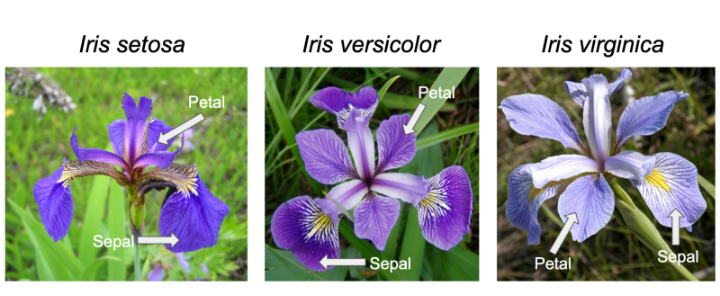

# **AIM :**

### Assume that you have the measurements of the iris flowers according totheir species, and here your task is to train a machine learning model that can learn from themeasurements of the iris species and classify them

# Import necessary libraries :

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Dealing with given Dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.index

RangeIndex(start=0, stop=150, step=1)

### As the name suggests, it gives a basic desciption of data like count,min,max,etc

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### deleting 'Id' column to increase aaccuracy_score

In [8]:
df = df.drop(columns = ['Id'])

### checking null values in dataset

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### checking duplicate values in dataset

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

### displaying no. of unique species present in each class 

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

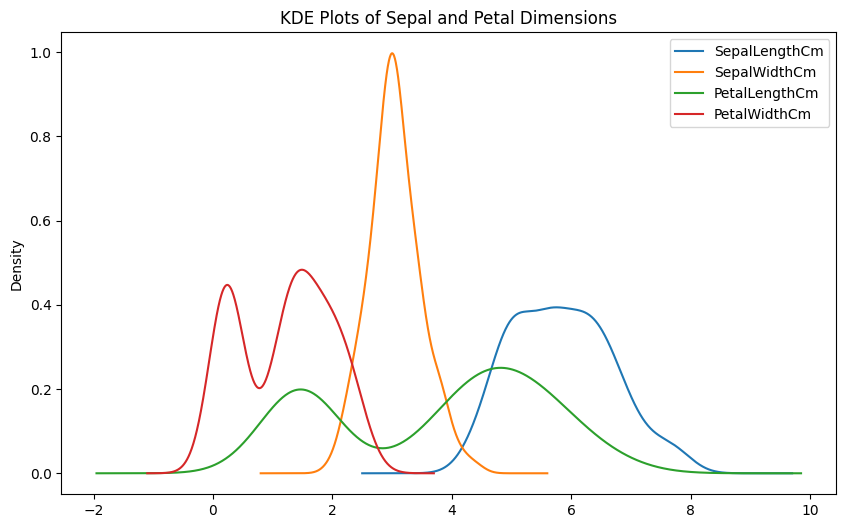

In [12]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].plot(kind='kde', figsize=(10, 6))
plt.title('KDE Plots of Sepal and Petal Dimensions')
plt.show()


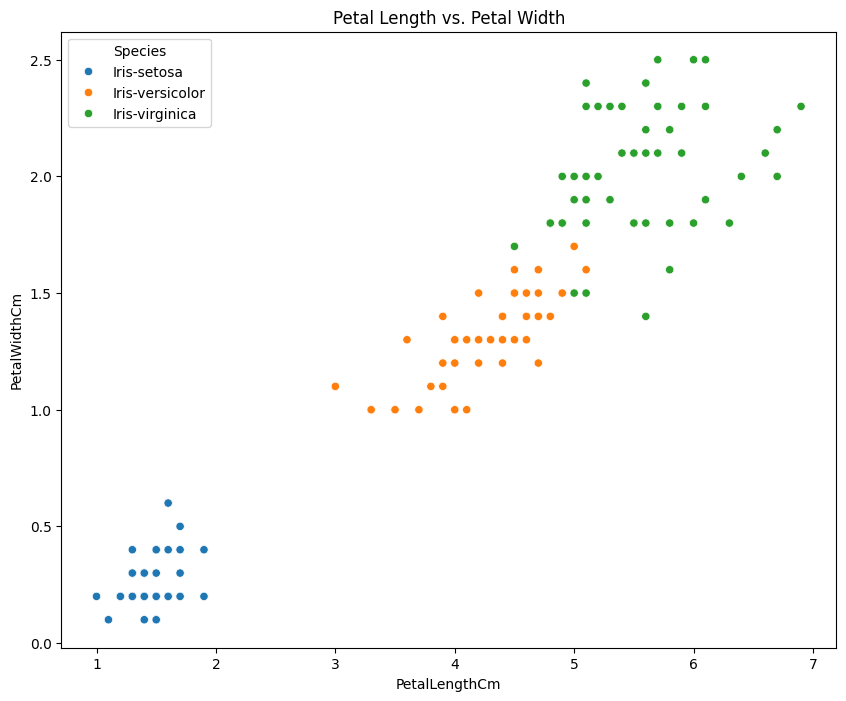

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Petal Length vs. Petal Width')
plt.show()

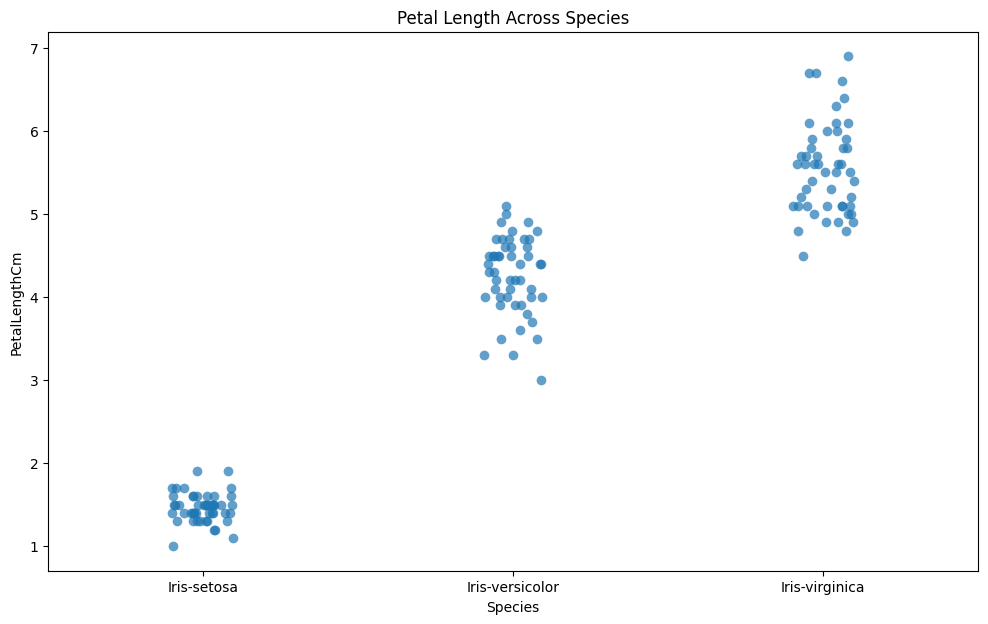

In [14]:
plt.figure(figsize=(12, 7))
sns.stripplot(x='Species', y='PetalLengthCm', data=df, jitter=True, size=7, alpha=0.7)
plt.title('Petal Length Across Species')
plt.show()


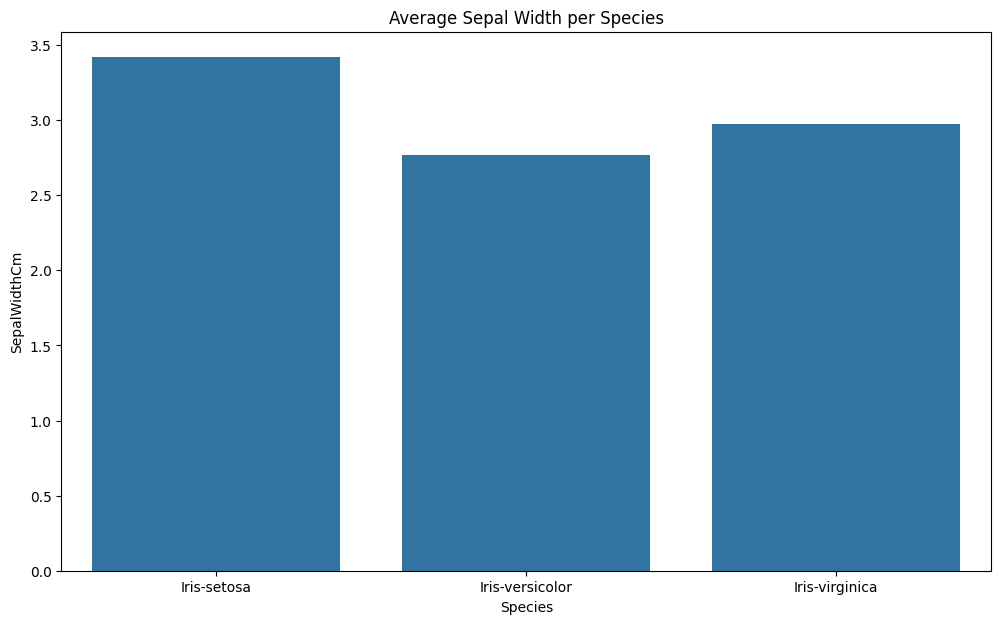

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Species', y='SepalWidthCm', data=df, ci=None)
plt.title('Average Sepal Width per Species')
plt.show()


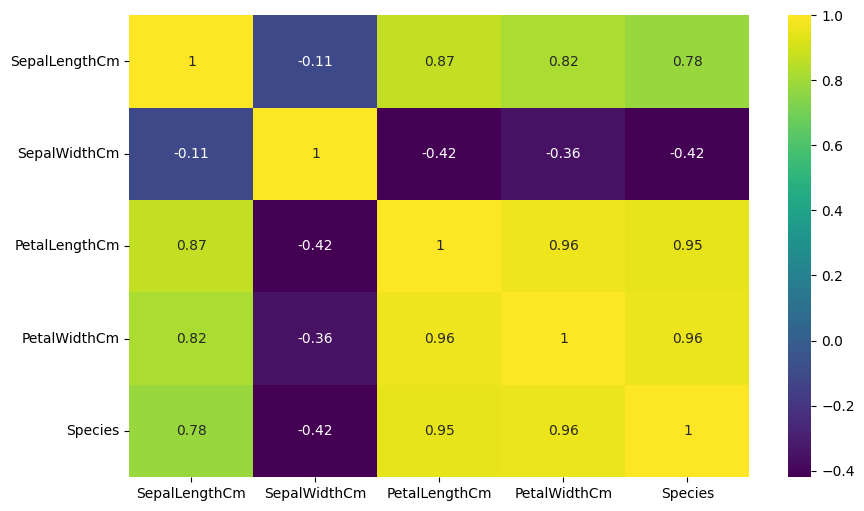

In [16]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()


### Importing Necessary Libraries and Models

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

### Model Training and Testing

In [37]:
train, test = train_test_split(df, test_size=0.4)
print(train.shape, test.shape)
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
train_X, train_y = train[features], train['Species']
test_X, test_y = test[features], test['Species']

(90, 5) (60, 5)


## Initialize the Logistic Regression model

In [19]:
log_reg = LogisticRegression()

### Fit the model on the training data

In [20]:
log_reg.fit(train_X, train_y)

LogisticRegression()


### Predict the Labels for the Test set

In [21]:
predictions = log_reg.predict(test_X)

### Calculate the Accuracy of the Model

In [22]:
model_accuracy = accuracy_score(test_y, predictions)

### Print the Accuracy with Formatting

In [38]:
print(f"Model Accuracy: {model_accuracy:.2f}")

Model Accuracy: 1.00


## Initialise the Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

### Fit the model on training data

In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_X, train_y)

DecisionTreeClassifier()

### Make Predictions on the Test Data

In [26]:
predictions = dt_model.predict(test_X)

### Calculate the Accuracy of the Model

In [27]:
model_accuracy = accuracy_score(test_y, predictions)

### Print the Accuracy with Formatting

In [39]:
print(f"Model Accuracy: {model_accuracy:.2f}")

Model Accuracy: 1.00


## Initialize the K-Nearest Neighbours Model(KNN Model)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

### Fit the model on training data

In [30]:
KNN_MODEL = KNeighborsClassifier()
KNN_MODEL.fit(train_X,train_y)

KNeighborsClassifier()

### Make Predictions on the Test Data

In [31]:
predictions = KNN_MODEL.predict(test_X)

### Calculate the Accuracy of the Model

In [32]:
model_accuracy = accuracy_score(test_y, predictions)

### Print the Accuracy with Formatting

In [40]:
print(f"Model Accuracy: {model_accuracy:.2f}")

Model Accuracy: 1.00





## Dont Forget to Plot the Confusion Matrix :

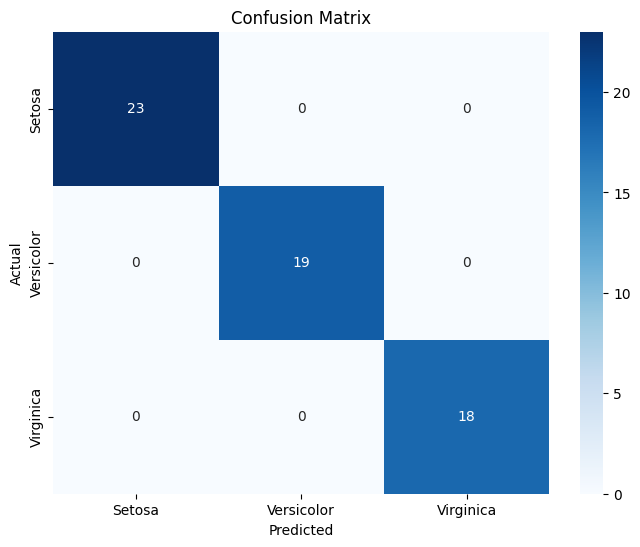

In [34]:
labels = ['Setosa', 'Versicolor', 'Virginica']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, predictions), annot=True, cmap="Blues", fmt="d",
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# THANK YOU OASIS INFOBYTE FOR THE OPPORTUNITY